## Init
read the excel file and show the first rows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar
import locale
from tabulate import tabulate
import plotly.graph_objs as go

# Load the new Excel file
file_path = 'PSM_2024.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand its structure
print(tabulate(df.head()))


-  --------  -------------  -------------------------------------------  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  ---  ---  ---  ---  ---
0  KMON FFM  Ahmed, Tanvir  DPM                                          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  nan  nan  nan  nan  nan
1  KMON FFM  Ahmed, Tanvir  DPM  Customer Support / Maintenance          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  nan  nan  nan  nan  nan
2  KMON FFM  Ahmed, Tanvir  Retrofitting                                 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  nan  nan  nan  nan  nan
3  KMON FFM  Ahmed, Tanvir  PPS (STOLL)  Customer Support / Maintenance  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  nan  nan  nan  nan  nan
4  KMON FFM  Ahmed, Tanvir  PPS (STOLL) Development                      0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  nan  nan  nan  nan  nan
-  --------  -------------  -------------------------------------------  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  ---  ---  ---  ---  ---


## Global variables
define global variables and define the relevant timeframe (months to consider)

In [3]:
# Set locale to German (Germany)
locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')

# Custom list of month abbreviations
custom_months = ['Jan', 'Feb', 'Mrz', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

# Get the current month
current_month = datetime.datetime.now().month

# Generate list of months from January up to the current month
#months = [calendar.month_abbr[i] for i in range(1, current_month + 1)]
months = custom_months[:current_month]

# Output the result
print(months)

#months = ['Jan', 'Feb', 'Mrz', 'Apr', 'Mai', 'Jun', 'Jul']

# List of projects to filter
projects_list = [
#"Enablement Center",
    "KARL MAYER - k.partner API",
    "KARL MAYER - WK_MR173_X-Batcher",
    "KARL MAYER - WK_CS107_Digital Service Solutions",
    "KARL MAYER - WK_MR181_Smart_Beam",
    "KARL MAYER - WK_CS112_Future Business Models – Imple.",
    "KARL MAYER - WK_CS113_Customer Portal – Part II / GRO",
    "KARL MAYER - WK_CS Service 4.0 Global Roll-Out",
    "KARL MAYER - WK_CS_Serial Support Digi. Services & So",
    "KARL MAYER - WK_Energy Monitoring Serial Imple.",
    "KARL MAYER - Energy Management",
    "KARL MAYER - WP QM Cloud Solution",
    "KARL MAYER - WP QM Datenübertragung",
    "KARL MAYER - WP Dashboard",
    "KARL MAYER - WP Cloud-Daten / OPC-UA-KMSF"
]

dashboard_projects_list = [
    "Dashboard",
    "Dashboard  Customer Support / Maintenance"
]

# Define the hourly rates
hourly_rate_hkg = 62
hourly_rate_fra = 112

# Given yearly labor costs
yearly_labor_costs = 569553

# Calculate the monthly labor costs
monthly_labor_costs = yearly_labor_costs / 12



['Jan', 'Feb', 'Mrz', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep']


## Total hours per project per month

In [4]:
# Filter the dataframe for the specified projects
projects_df = df[df['Projekt'].isin(projects_list)]

# Sum the hours booked per project from January to the current month (assuming it's June)
total_hours_per_project = projects_df.groupby('Projekt')[months].sum()

# Calculate total hours booked per project for the booked months
total_hours_per_project['Total Hours'] = total_hours_per_project.sum(axis=1)

# Highlighting maximum values in a column
total_hours_per_project.style.highlight_max(axis=1)

total_hours_per_project


,Jan,Feb,Mrz,Apr,Mai,Jun,Jul,Aug,Sep,Total Hours
Projekt,,,,,,,,,,
KARL MAYER - Energy Management,378.0,239.0,299.0,2.0,0.0,39.0,0.0,0.0,0.0,957.0
KARL MAYER - WK_CS Service 4.0 Global Roll-Out,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KARL MAYER - WK_CS112_Future Business Models – Imple.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KARL MAYER - WK_CS113_Customer Portal – Part II / GRO,0.0,0.0,0.0,0.0,5.0,10.0,53.0,0.0,0.0,68.0
KARL MAYER - WK_Energy Monitoring Serial Imple.,0.0,0.0,0.0,327.0,420.0,294.0,269.0,0.0,0.0,1310.0
KARL MAYER - WK_MR181_Smart_Beam,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0
KARL MAYER - WP Cloud-Daten / OPC-UA-KMSF,0.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,7.0
KARL MAYER - WP Dashboard,0.0,12.0,0.0,2.0,4.0,30.0,1.0,0.0,0.0,49.0
KARL MAYER - WP QM Cloud Solution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:

# Filter the dataframe for the specified projects
db_projects_df = df[df['Projekt'].isin(dashboard_projects_list)]

# Sum the hours booked per project from January to the current month (assuming it's June)
db_total_hours_per_project = db_projects_df.groupby('Projekt')[months].sum()

# Calculate total hours booked per project for the booked months
db_total_hours_per_project['Total Hours'] = db_total_hours_per_project.sum(axis=1)

db_total_hours_per_project

,Jan,Feb,Mrz,Apr,Mai,Jun,Jul,Aug,Sep,Total Hours
Projekt,,,,,,,,,,
Dashboard,346.0,316.0,280.0,191.0,118.0,154.0,61.0,0.0,0.0,1466.0
Dashboard Customer Support / Maintenance,1.0,0.0,8.0,2.0,33.0,28.0,41.0,0.0,0.0,113.0


## Turnover summary per project and location

### Turnover per project and location

In [6]:
# Recalculate the turnovers manually and ensure correct data handling


projects_with_hours = total_hours_per_project[total_hours_per_project['Total Hours'] > 0]


# Calculate summed up price for hours booked in Hong Kong and Frankfurt
turnover_hkg = projects_df[projects_df['Standort'] == 'KMON HK'].groupby('Projekt')[months].sum().sum(axis=1) * hourly_rate_hkg
turnover_fra = projects_df[projects_df['Standort'] == 'KMON FFM'].groupby('Projekt')[months].sum().sum(axis=1) * hourly_rate_fra

# Create a DataFrame to summarize these results
turnover_summary = pd.DataFrame({
    'Turnover HKG (€)': turnover_hkg,
    'Turnover FRA (€)': turnover_fra
})

# Calculate the final price as the sum of HKG and FRA turnover
turnover_summary['Final Price (€)'] = turnover_summary['Turnover HKG (€)'] + turnover_summary['Turnover FRA (€)']

# Filter projects with total hours booked greater than zero
turnover_summary = turnover_summary.loc[projects_with_hours.index]

turnover_summary


,Turnover HKG (€),Turnover FRA (€),Final Price (€)
Projekt,,,
KARL MAYER - Energy Management,42904.0,29680.0,72584.0
KARL MAYER - WK_CS113_Customer Portal – Part II / GRO,0.0,7616.0,7616.0
KARL MAYER - WK_Energy Monitoring Serial Imple.,59272.0,39648.0,98920.0
KARL MAYER - WK_MR181_Smart_Beam,0.0,224.0,224.0
KARL MAYER - WP Cloud-Daten / OPC-UA-KMSF,0.0,784.0,784.0
KARL MAYER - WP Dashboard,0.0,5488.0,5488.0
KARL MAYER - WP QM Datenübertragung,0.0,112.0,112.0
KARL MAYER - k.partner API,0.0,36848.0,36848.0


### Turnover per project and location and month

In [7]:
# Group by 'Projekt' and 'Standort' and sum the hours per month
monthly_turnover = projects_df.groupby(['Projekt', 'Standort'])[months].sum()

# Calculate the turnover based on location-specific rates
monthly_turnover.loc[:, 'Jan':'Sep'] = monthly_turnover.loc[:, 'Jan':'Sep'].mul(
    [(hourly_rate_hkg) if loc == 'KMON HK' else (hourly_rate_fra) for loc in monthly_turnover.index.get_level_values('Standort')],
    axis=0
)

# Reset the index for better readability
monthly_turnover.reset_index(inplace=True)

#tools.display_dataframe_to_user(name="Monthly Turnover per Project and Location", dataframe=monthly_turnover)

monthly_turnover

,Projekt,Standort,Jan,Feb,Mrz,Apr,Mai,Jun,Jul,Aug,Sep
0,KARL MAYER - Energy Management,KMON FFM,9632.0,6608.0,8848.0,224.0,0.0,4368.0,0.0,0.0,0.0
1,KARL MAYER - Energy Management,KMON HK,18104.0,11160.0,13640.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KARL MAYER - WK_CS Service 4.0 Global Roll-Out,KMON FFM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,KARL MAYER - WK_CS Service 4.0 Global Roll-Out,KMON HK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,KARL MAYER - WK_CS112_Future Business Models –...,KMON FFM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,KARL MAYER - WK_CS112_Future Business Models –...,KMON HK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,KARL MAYER - WK_CS113_Customer Portal – Part I...,KMON FFM,0.0,0.0,0.0,0.0,560.0,1120.0,5936.0,0.0,0.0
7,KARL MAYER - WK_CS113_Customer Portal – Part I...,KMON HK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,KARL MAYER - WK_Energy Monitoring Serial Imple.,KMON FFM,0.0,0.0,0.0,7952.0,4144.0,6720.0,20832.0,0.0,0.0
9,KARL MAYER - WK_Energy Monitoring Serial Imple.,KMON HK,0.0,0.0,0.0,15872.0,23746.0,14508.0,5146.0,0.0,0.0


In [9]:
# Sum the hours booked per project per month
total_hours_per_project_new = projects_df.groupby('Projekt')[months].sum()

# Calculate turnover for Hong Kong and Frankfurt with updated rates
updated_turnover_hkg = projects_df[projects_df['Standort'] == 'KMON HK'].groupby('Projekt')[months].sum() * (39*1.065)
updated_turnover_fra = projects_df[projects_df['Standort'] == 'KMON FFM'].groupby('Projekt')[months].sum() * (83*1.065)

# Combine turnover
total_turnover = updated_turnover_hkg.add(updated_turnover_fra, fill_value=0)

# Sum turnover per month
monthly_turnover = total_turnover.sum(axis=0)

# Calculate monthly profit/loss
monthly_profit_loss = monthly_turnover - monthly_labor_costs

# Create DataFrame for monthly P&L analysis
monthly_pnl = pd.DataFrame({
    'Monthly Turnover (€)': monthly_turnover,
    'Monthly Labor Costs (€)': [monthly_labor_costs] * 9,
    'Monthly Profit/Loss (€)': monthly_profit_loss
})

#import ace_tools as tools; tools.display_dataframe_to_user(name="Monthly Profit and Loss Analysis (Jan-Jun 2024)", dataframe=monthly_pnl)

monthly_pnl


ValueError: array length 6 does not match index length 9

TypeError: unhashable type: 'numpy.ndarray'

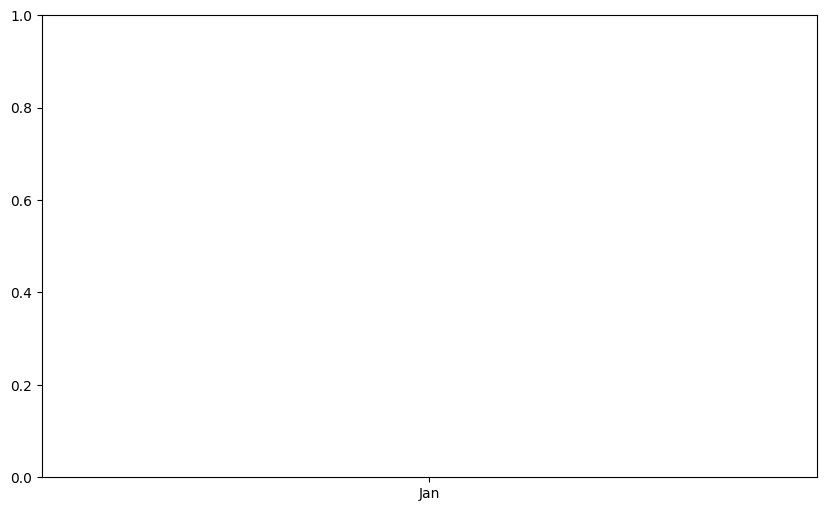

In [40]:
labor_costs = [monthly_labor_costs] * 6
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(months, monthly_turnover, label='Monthly Turnover (€)', marker='o')
plt.plot(months, labor_costs, label='Monthly Labor Costs (€)', linestyle='--', marker='x')
plt.plot(months, monthly_profit_loss, label='Monthly Profit/Loss (€)', linestyle='-', marker='s')

plt.xlabel('Month')
plt.ylabel('Amount (€)')
plt.title('Monthly Profit and Loss Analysis (Jan-Jun 2024)')
plt.axhline(0, color='grey', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Trends of booked project hours per project

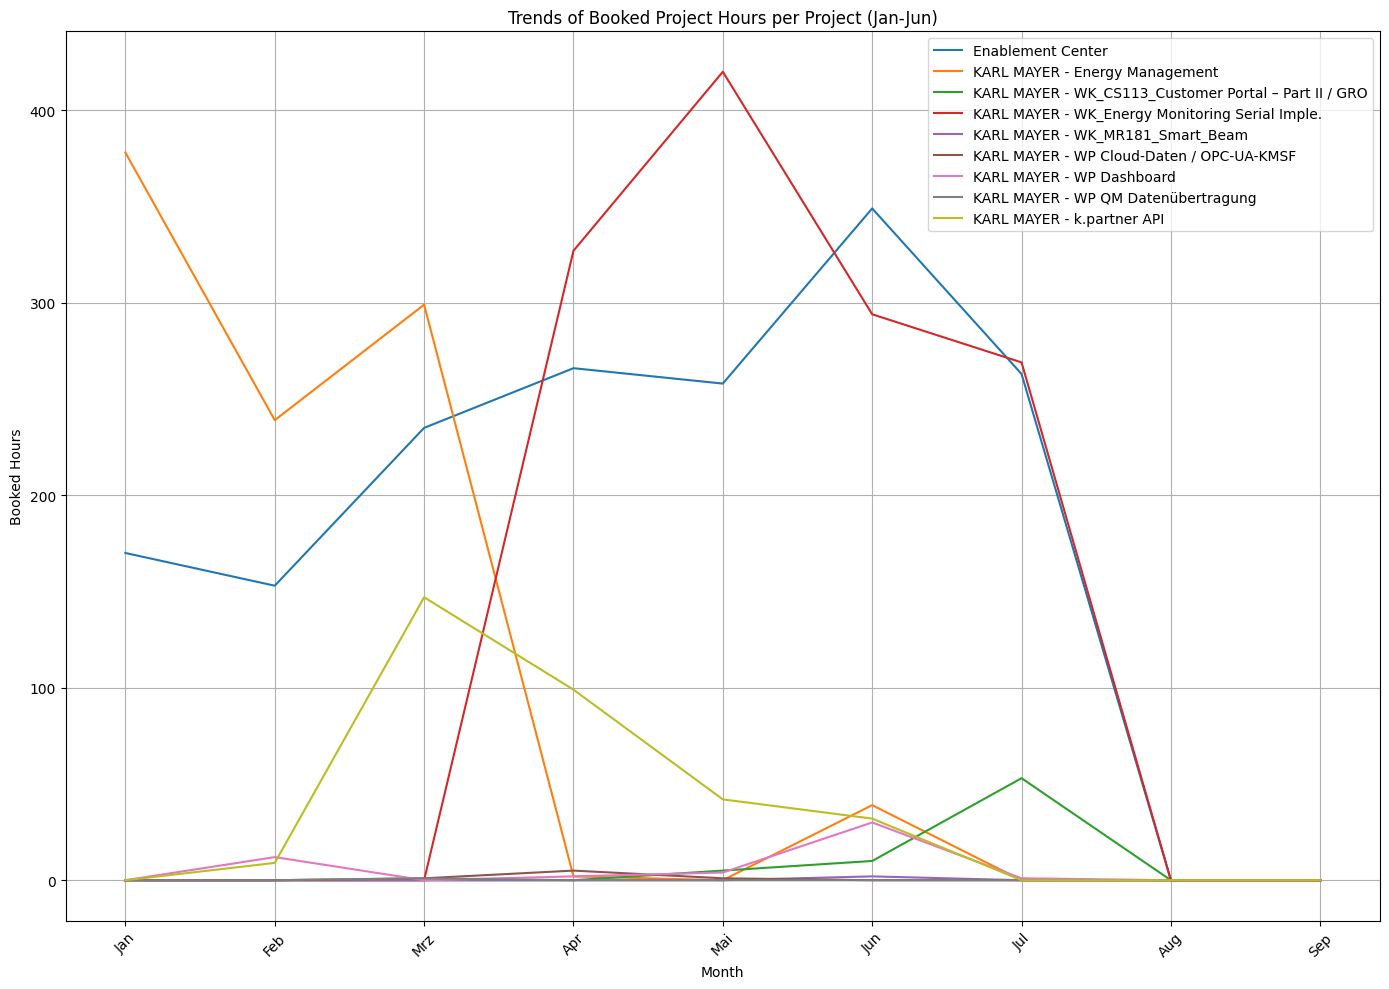

In [39]:
plt.figure(figsize=(14, 10))

for project in projects_with_hours.index:
    plt.plot(months, projects_with_hours.loc[project, months], label=project)

plt.xlabel('Month')
plt.ylabel('Booked Hours')
plt.title('Trends of Booked Project Hours per Project (Jan-Jun)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
